In [1]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-06-27 23:57:57.920941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 23:57:59.130633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:


def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data=json.load(fp)

    inputs=np.array(data['mfcc'])
    targets=np.array(data['labels'])

    return inputs,targets

In [5]:
inputs,targets=load_data('data_project.json')

In [4]:
targets

array([0, 0, 0, ..., 5, 5, 5])

In [5]:
input_train,input_test,target_train,target_test=train_test_split(inputs,targets,test_size=0.3)

In [6]:
inputs.shape

(5038, 259, 13)

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

2023-06-26 13:48:25.894469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 13:48:26.004328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 13:48:26.004620: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,872,582
Trainable params: 1,872,582
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

2023-06-26 13:48:27.239459: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.


Epoch 1/100


2023-06-26 13:48:27.339598: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-26 13:48:28.625560: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x1fc8f6c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-26 13:48:28.625599: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-06-26 13:48:28.671114: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-26 13:48:28.907781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-26 13:48:29.177875: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


111/111 [==============================] - 3s 4ms/step - loss: 14.1411 - accuracy: 0.3880 - val_loss: 3.3342 - val_accuracy: 0.4676
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 3.5331 - accuracy: 0.4801 - val_loss: 3.5339 - val_accuracy: 0.4782
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 2.0087 - accuracy: 0.5652 - val_loss: 2.6209 - val_accuracy: 0.5126
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 1.4084 - accuracy: 0.6001 - val_loss: 2.0319 - val_accuracy: 0.4881
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 1.1508 - accuracy: 0.6438 - val_loss: 1.5759 - val_accuracy: 0.5615
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.9046 - accuracy: 0.6997 - val_loss: 1.5157 - val_accuracy: 0.5403
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.7541 - val_loss: 1.5780 - val_accuracy: 0.5509
Epoch 8/10

In [11]:


def plot_accuracy_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['accuracy'],label='train_accuracy')
    plt.plot(history_plot['val_accuracy'],label='test_accuracy')
    plt.legend(['train_accuracy','test_accuracy'])
    plt.title("Accuracy curves")
    plt.xlabel("Epochs")

In [12]:
def plot_loss_curves(history):
    history_plot=pd.DataFrame(history.history)

    plt.plot(history_plot['loss'],label='train_loss')
    plt.plot(history_plot['val_loss'],label='test_loss')
    plt.legend(['train_loss','test_loss'])
    plt.title("Loss curves")
    plt.xlabel("Epochs")

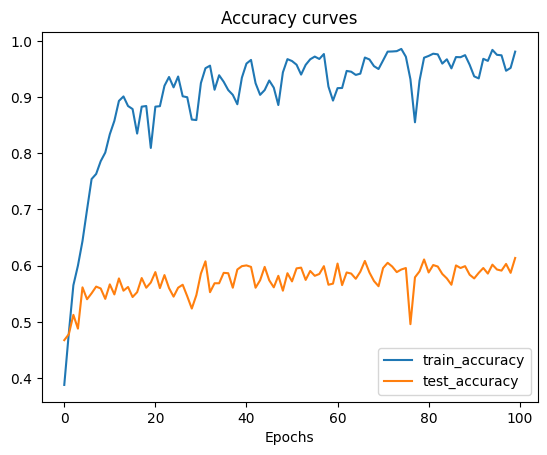

In [13]:
plot_accuracy_curves(history)

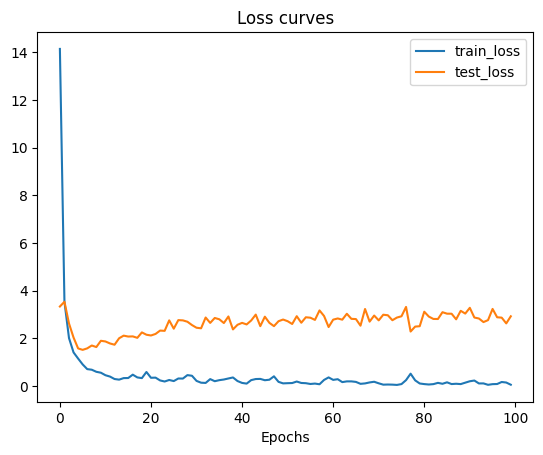

In [14]:
plot_loss_curves(history)

In [15]:
#Reducing neurons, applying dropout and L2 regularization to reduce overfitting

model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

Epoch 1/100


2023-06-26 13:49:00.485654: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-26 13:49:00.555612: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.


111/111 [==============================] - 1s 4ms/step - loss: 0.1398 - accuracy: 0.9586 - val_loss: 3.4247 - val_accuracy: 0.6012
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9606 - val_loss: 3.5038 - val_accuracy: 0.6058
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9770 - val_loss: 3.5227 - val_accuracy: 0.5985
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9708 - val_loss: 3.9182 - val_accuracy: 0.5985
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9611 - val_loss: 3.9842 - val_accuracy: 0.5655
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.9458 - val_loss: 2.8661 - val_accuracy: 0.5860
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9708 - val_loss: 2.9705 - val_accuracy: 0.6045
Epoch 8/100

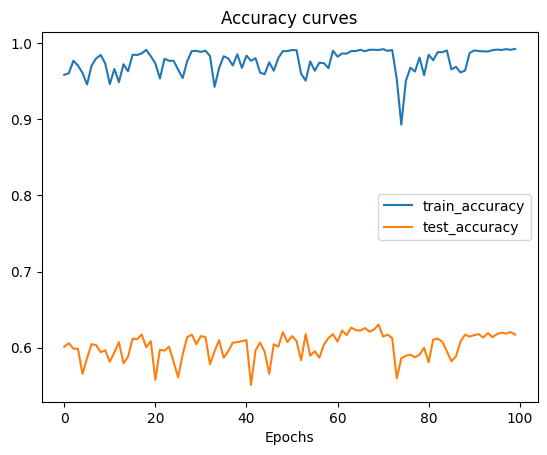

In [16]:
plot_accuracy_curves(history2)

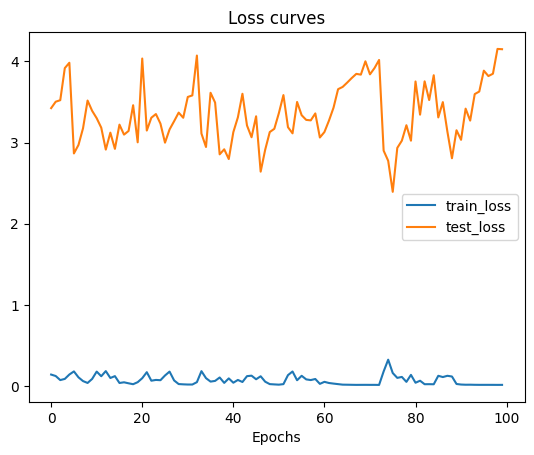

In [17]:
plot_loss_curves(history2)

# Building our CNN Model

In [6]:
def train_test_validation_split(test_size,validation_size):
    X_train,X_test,target_train,y_test=train_test_split(inputs,targets,test_size=test_size)
    X_train,X_validation,target_train,y_validation=train_test_split(X_train,target_train,test_size=validation_size)

    X_train=X_train[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]

    return X_train,X_test,X_validation,target_train,y_test,y_validation

In [7]:
X_train,X_test,X_validation,target_train,y_test,y_validation=train_test_validation_split(0.25,0.2)

In [120]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train.reshape(X_train.shape[0],-1)).reshape(X_train.shape)
# X_test=scaler.transform(X_test.reshape(X_test.shape[0],-1)).reshape(X_test.shape)
# X_validation=scaler.transform(X_validation.reshape(X_validation.shape[0],-1)).reshape(X_validation.shape)

In [122]:
X_train.shape

(3022, 259, 13, 1)

In [123]:
X_train[0][0]

array([[0.69514125],
       [0.72938608],
       [0.52048556],
       [0.4832059 ],
       [0.69448486],
       [0.39760822],
       [0.41640601],
       [0.60083988],
       [0.64681353],
       [0.62997167],
       [0.20889232],
       [0.33132987],
       [0.39257075]])

In [72]:
def build_model(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(6,activation='softmax')
    ])

    return model

In [73]:
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
cnn_model=build_model(input_shape)
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 257, 11, 64)       640       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 129, 6, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 129, 6, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 127, 4, 32)        18464     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 64, 2, 32)        0         
 g2D)                                                            
                                                     

In [78]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.00003),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
cnn_history=cnn_model.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=100,batch_size=32)

Epoch 1/100
95/95 [==============================] - 3s 9ms/step - loss: 0.4991 - accuracy: 0.8253 - val_loss: 0.9947 - val_accuracy: 0.7011
Epoch 2/100
95/95 [==============================] - 1s 8ms/step - loss: 0.4695 - accuracy: 0.8273 - val_loss: 0.8884 - val_accuracy: 0.7275
Epoch 3/100
95/95 [==============================] - 1s 8ms/step - loss: 0.4812 - accuracy: 0.8296 - val_loss: 0.9253 - val_accuracy: 0.7235
Epoch 4/100
95/95 [==============================] - 1s 8ms/step - loss: 0.4881 - accuracy: 0.8180 - val_loss: 0.8979 - val_accuracy: 0.7209
Epoch 5/100
95/95 [==============================] - 1s 8ms/step - loss: 0.4783 - accuracy: 0.8289 - val_loss: 0.8850 - val_accuracy: 0.7209
Epoch 6/100
95/95 [==============================] - 1s 8ms/step - loss: 0.4797 - accuracy: 0.8210 - val_loss: 0.9166 - val_accuracy: 0.7050
Epoch 7/100
95/95 [==============================] - 1s 8ms/step - loss: 0.4735 - accuracy: 0.8299 - val_loss: 0.9038 - val_accuracy: 0.7209
Epoch 8/100
9

In [91]:
cnn_model.evaluate(X_test,y_test)

40/40 [==============================] - 0s 9ms/step - loss: 1.1379 - accuracy: 0.7008


[1.1379153728485107, 0.7007936239242554]

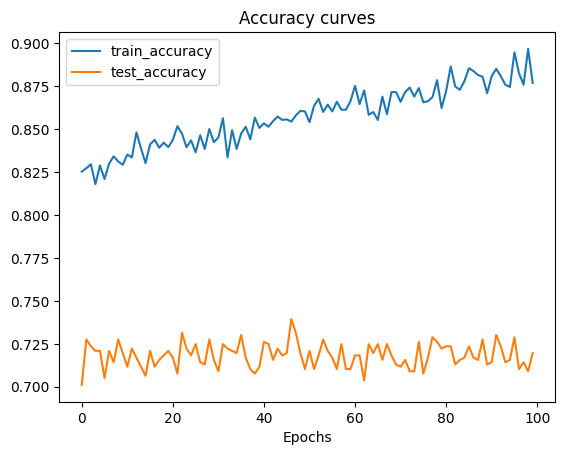

In [82]:
plot_accuracy_curves(cnn_history)

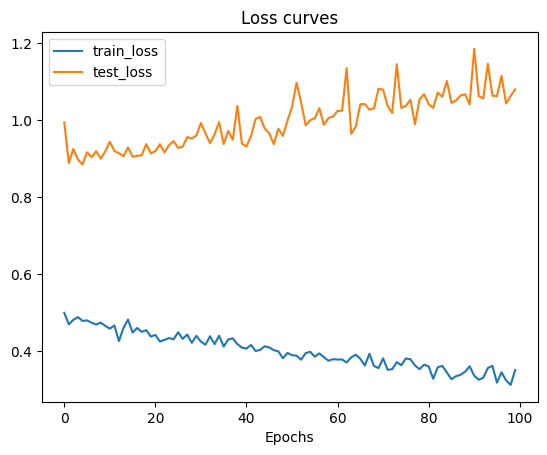

In [83]:
plot_loss_curves(cnn_history)

In [95]:
test_error,test_accuracy=cnn_model.evaluate(X_test,y_test,verbose=1)

40/40 [==============================] - 0s 3ms/step - loss: 1.1379 - accuracy: 0.7008


In [90]:
cnn_model2=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='leaky_relu',input_shape=input_shape),
        tf.keras.layers.Conv2D(64,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        

        tf.keras.layers.Conv2D(32,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16,(2,2),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(6,activation='softmax')
    ])

cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 257, 11, 128)      1280      
                                                                 
 conv2d_52 (Conv2D)          (None, 255, 9, 64)        73792     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 128, 5, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 128, 5, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 126, 3, 32)        18464     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 63, 2, 32)      

In [92]:
cnn_history2=cnn_model2.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=200,batch_size=32)

Epoch 1/200
95/95 [==============================] - 8s 42ms/step - loss: 2.3030 - accuracy: 0.1764 - val_loss: 1.8147 - val_accuracy: 0.1323
Epoch 2/200
95/95 [==============================] - 3s 28ms/step - loss: 2.2151 - accuracy: 0.1803 - val_loss: 1.8338 - val_accuracy: 0.1323
Epoch 3/200
95/95 [==============================] - 3s 28ms/step - loss: 2.1419 - accuracy: 0.1870 - val_loss: 1.9252 - val_accuracy: 0.1323
Epoch 4/200
95/95 [==============================] - 3s 28ms/step - loss: 2.0913 - accuracy: 0.2028 - val_loss: 2.0510 - val_accuracy: 0.1323
Epoch 5/200
95/95 [==============================] - 3s 28ms/step - loss: 2.0622 - accuracy: 0.2002 - val_loss: 2.0342 - val_accuracy: 0.1323
Epoch 6/200
95/95 [==============================] - 3s 28ms/step - loss: 1.9988 - accuracy: 0.2204 - val_loss: 1.8769 - val_accuracy: 0.1455
Epoch 7/200
95/95 [==============================] - 3s 28ms/step - loss: 1.9658 - accuracy: 0.2237 - val_loss: 1.7397 - val_accuracy: 0.2196
Epoch 

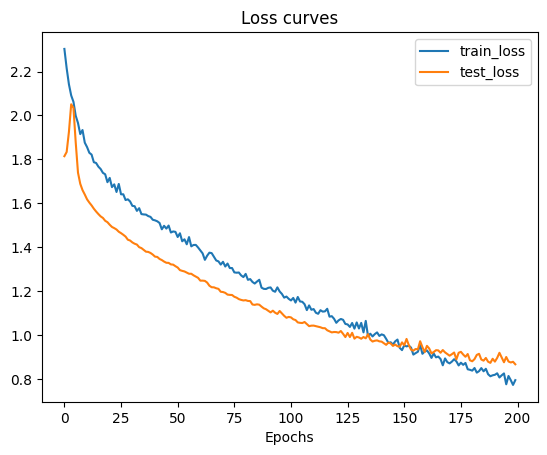

In [93]:
plot_loss_curves(cnn_history2)

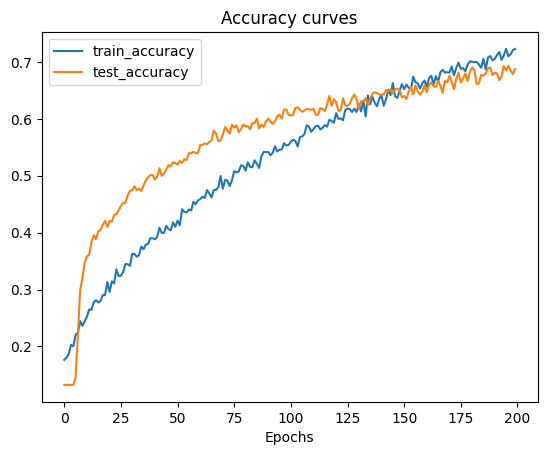

In [94]:
plot_accuracy_curves(cnn_history2)

In [96]:
cnn_model2.evaluate(X_test,y_test)

40/40 [==============================] - 1s 17ms/step - loss: 0.8533 - accuracy: 0.7095


[0.8533408641815186, 0.7095237970352173]

In [136]:
cnn_model3=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='leaky_relu',input_shape=input_shape),
        tf.keras.layers.Conv2D(64,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        

        tf.keras.layers.Conv2D(32,(3,3),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16,(2,2),activation='leaky_relu'),
        tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(16,activation='leaky_relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(6,activation='softmax')
    ])

cnn_model3.compile(optimizer=tf.keras.optimizers.Adam(0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model3.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 257, 11, 128)      1280      
                                                                 
 conv2d_123 (Conv2D)         (None, 255, 9, 64)        73792     
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 128, 5, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_49 (Bat  (None, 128, 5, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_124 (Conv2D)         (None, 126, 3, 32)        18464     
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 63, 2, 32)      

In [139]:
cnn_history3=cnn_model3.fit(X_train,target_train,validation_data=(X_validation,y_validation),epochs=500,batch_size=32)

Epoch 1/500
95/95 [==============================] - 6s 31ms/step - loss: 2.4730 - accuracy: 0.1800 - val_loss: 2.2764 - val_accuracy: 0.2090
Epoch 2/500
95/95 [==============================] - 3s 28ms/step - loss: 2.3412 - accuracy: 0.1923 - val_loss: 1.9630 - val_accuracy: 0.2275
Epoch 3/500
95/95 [==============================] - 3s 28ms/step - loss: 2.2855 - accuracy: 0.1962 - val_loss: 1.8881 - val_accuracy: 0.2460
Epoch 4/500
95/95 [==============================] - 3s 28ms/step - loss: 2.2080 - accuracy: 0.2204 - val_loss: 1.8466 - val_accuracy: 0.2500
Epoch 5/500
95/95 [==============================] - 3s 28ms/step - loss: 2.1540 - accuracy: 0.2194 - val_loss: 1.7983 - val_accuracy: 0.2725
Epoch 6/500
95/95 [==============================] - 3s 28ms/step - loss: 2.1314 - accuracy: 0.2131 - val_loss: 1.7591 - val_accuracy: 0.2870
Epoch 7/500
95/95 [==============================] - 3s 29ms/step - loss: 2.0734 - accuracy: 0.2303 - val_loss: 1.7294 - val_accuracy: 0.3042
Epoch 

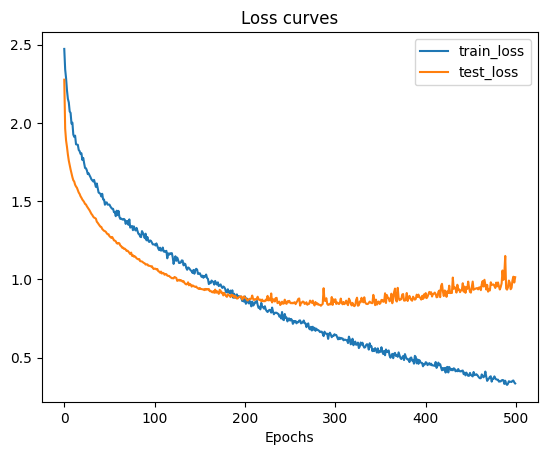

In [140]:
plot_loss_curves(cnn_history3)

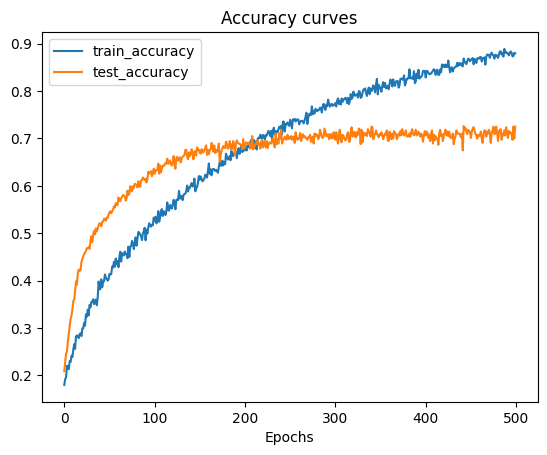

In [141]:
plot_accuracy_curves(cnn_history3)

In [142]:
cnn_model3.evaluate(X_test,y_test)

40/40 [==============================] - 0s 9ms/step - loss: 0.9795 - accuracy: 0.7294


[0.9795056581497192, 0.7293650507926941]

In [143]:
cnn_model3.save('cnn_model.h5')

In [3]:
cnn_best=tf.keras.models.load_model('cnn_model.h5')

2023-06-27 23:58:15.549903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-27 23:58:15.676183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-27 23:58:15.676387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
cnn_best.evaluate(X_test,y_test)

2023-06-27 23:58:42.964185: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


40/40 [==============================] - 4s 16ms/step - loss: 0.5093 - accuracy: 0.8619


[0.5092920064926147, 0.8619047403335571]

In [12]:
y_pred=cnn_best.predict(X_test)
ypred_labelled=y_pred.argmax(axis=1)

40/40 [==============================] - 0s 9ms/step


In [16]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_pred,figsize=(10,10)):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)
  

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

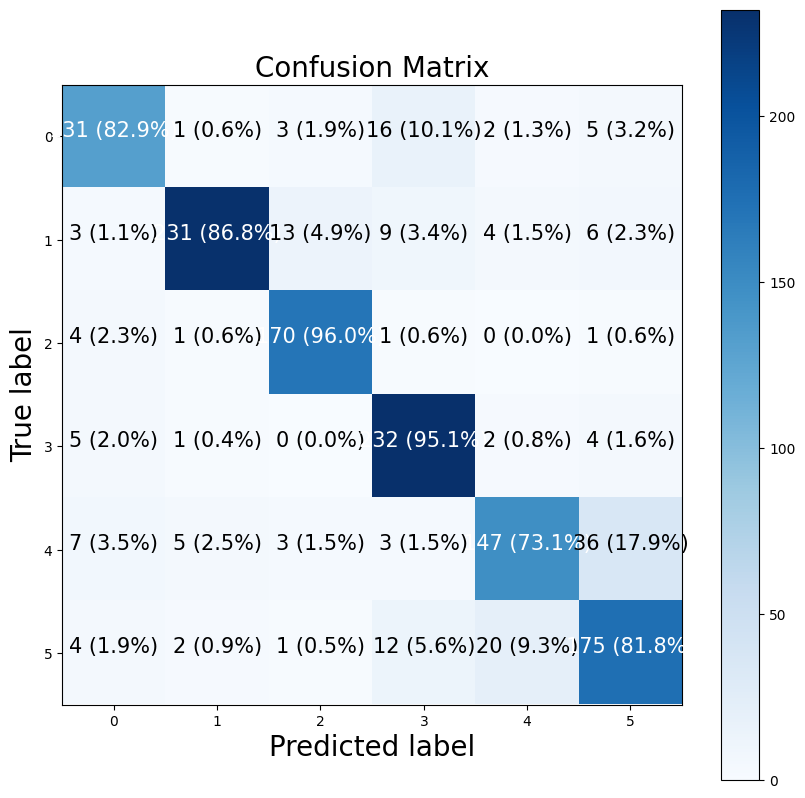

In [17]:
plot_confusion_matrix(y_test,ypred_labelled)